Week 6 Classification Methods

In [2]:
%pip install numpy
import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,roc_curve,auc,classification_report



Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('./data/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Target is to predict the species given the 4 features 

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# check for missing values 

print(f'Missing values: {data.isna().sum()}')
print(f'Null values: {data.isnull().sum()}')

Missing values: Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Null values: Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
# we dont need the id column so we drop it 

data.drop(columns = ['Id'],axis=1,inplace=True)

In [7]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
count_list = [(data.Species == 'Iris-setosa').sum(),(data.Species == 'Iris-versicolor').sum(),(data.Species == 'Iris-virginica').sum()]
label_list = list(data['Species'].unique())

count_list , label_list

([np.int64(50), np.int64(50), np.int64(50)],
 ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

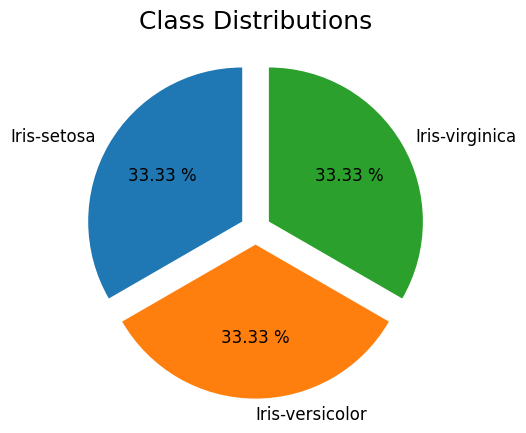

In [9]:
# pie chart of count 
plt.figure(figsize=(15,5))
plt.pie(count_list,labels=label_list,autopct="%.2f %%",startangle=90 ,explode = (.1,0.1,0.1),
        textprops = {'fontsize': 12})
plt.title('Class Distributions', fontsize = 18)
plt.show()

# Class imbalance : 
    If we have 100 data points , and we have 90 datapoints from class 1 , 5 from class 2 and 5 from class 3. There will not be enough data points for the model to learn
    

In [10]:
X = data.drop(['Species'],axis=1)
y = data['Species']

print(X,'\n', y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns] 
 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iri

In [11]:

# need not split 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# inverse tranform
label_encoder.inverse_transform([2])

array(['Iris-virginica'], dtype=object)

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)

ssc = StandardScaler()
X_train_scaled = ssc.fit_transform(X_train)
X_test_scaled = ssc.fit_transform(X_test)

In [14]:
# Naive Bayes Classifier 

gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_predicted = gnb.predict(X_test)
accuracy_gnb = gnb.score(X_test,y_test)

accuracy_gnb * 100

96.66666666666667

Precision , recall

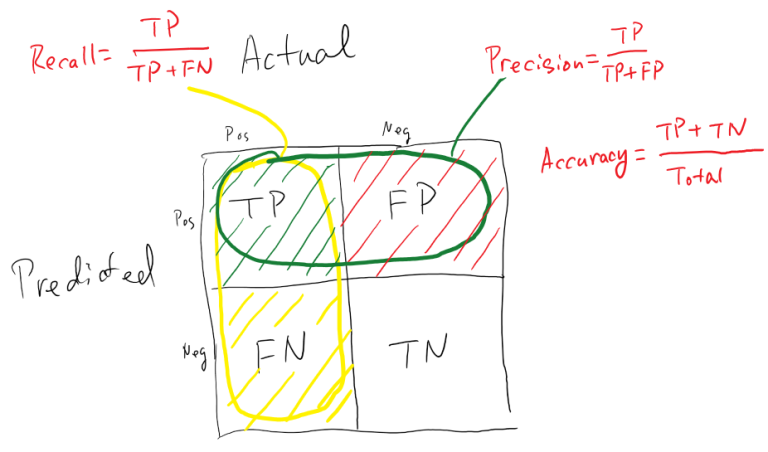

In [15]:
def generate_results(model, predictions , name):
    class_report = classification_report(y_test,predictions)
    print(f'Classification Report is : {class_report}')

    cm = confusion_matrix(y_test,predictions)

    plt.figure(figsize=(10,6))
    sns.heatmap(cm,annot=True,cmap='Spectral' , annot_kws={'size':15},square=True)
    plt.title(f'cONFUSION MATRIX for:{name}')
    plt.xticks(size = 15)
    plt.yticks(size=15)
    plt.show()


Classification Report is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



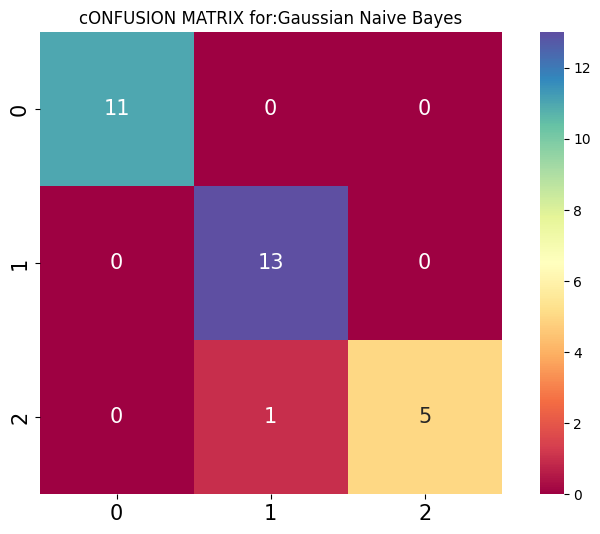

In [16]:
generate_results(gnb,y_predicted,"Gaussian Naive Bayes")

Linear Discriminant Analysis    

Accuracy:100.0
Classification Report is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



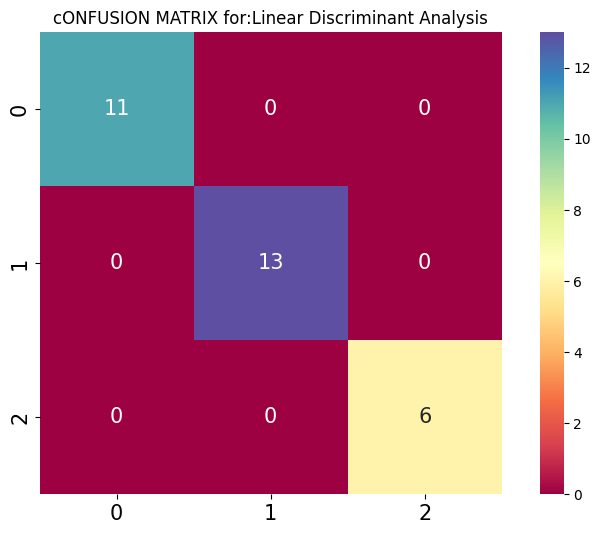

In [17]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train,y_train)
y_predict_LDA = lda.predict(X_test)
acc_lda  = lda.score(X_test,y_test)
print(f'Accuracy:{acc_lda*100}')
generate_results(lda,y_predict_LDA,"Linear Discriminant Analysis")

Quadritic Discriminatory Analysis (QDA)

In [18]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train,y_train)
y_predict_QDA = qda.predict(X_test)

accuracy_qda = qda.score(X_test,y_test)

print(f'Accuracy is{accuracy_qda*100}')

Accuracy is100.0


In [19]:
cm = classification_report(y_test,y_predict_QDA)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

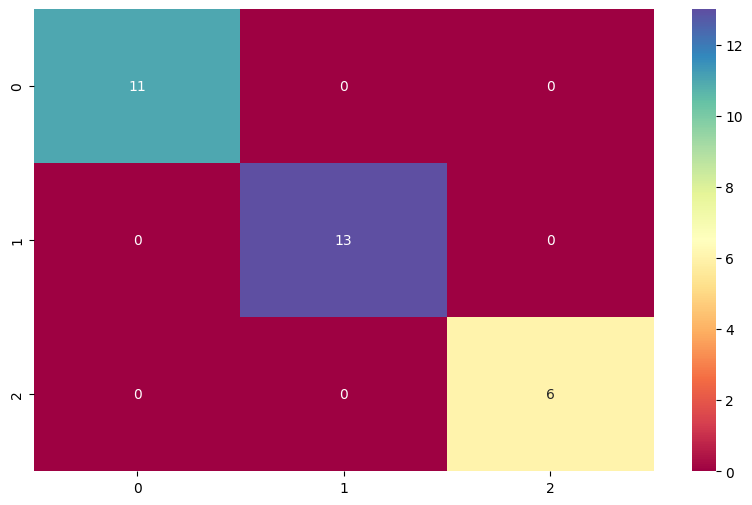

In [20]:
cfm = confusion_matrix(y_test,y_predict_QDA)

plt.figure(figsize=(10,6))
sns.heatmap(cfm, annot=True , cmap='Spectral')

ROC Curve 

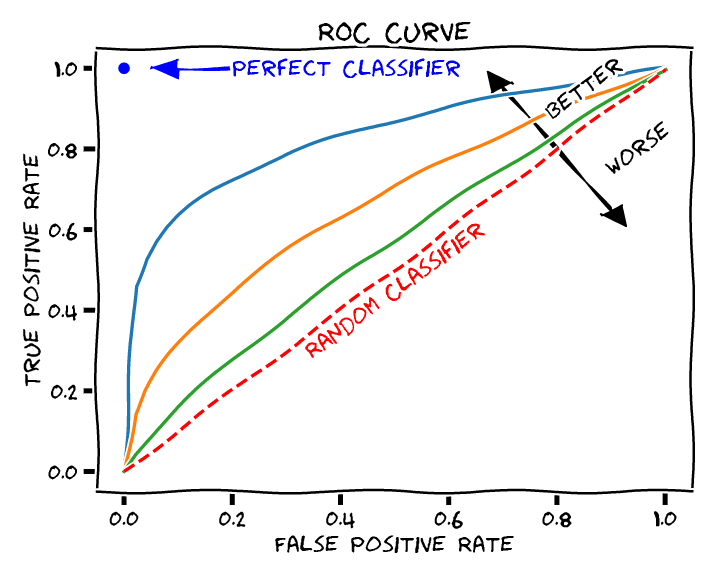

In [21]:
# Receiver Operator Characteristics 

probs = gnb.fit(X_train,y_train).predict_proba(X_test)

# Computing ROC curve 

fpr,tpr ,  thresholds = roc_curve(y_test,probs[:,1])
roc_auc = auc(fpr,tpr)
print("Area under ROC curve ="+roc_auc)

ValueError: multiclass format is not supported

# TODO : ROC for multi-class

Micro-average ROC AUC: 0.9994444444444444
ROC AUC for class 0: 1.0
ROC AUC for class 1: 1.0
ROC AUC for class 2: 1.0


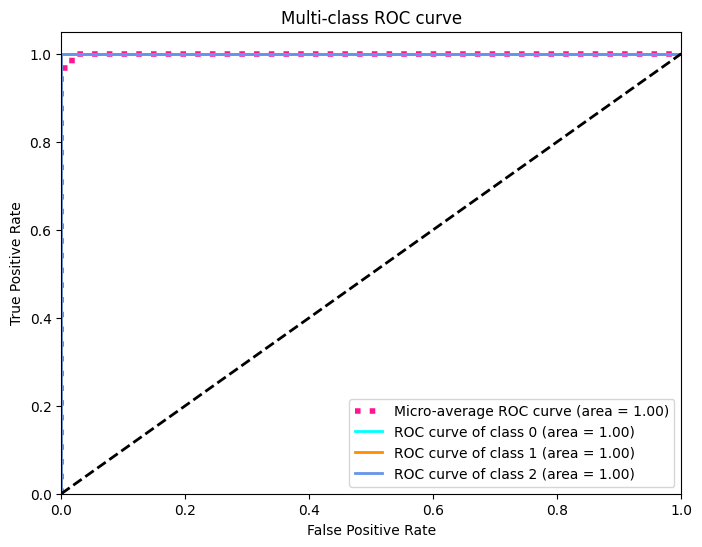

In [22]:
from sklearn.preprocessing import label_binarize

# Binarize the output (one vs rest)
n_classes = 3
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = gnb.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print("Micro-average ROC AUC:", roc_auc["micro"])
for i in range(n_classes):
    print(f"ROC AUC for class {i}: {roc_auc[i]}")

# Plot all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curve')
plt.legend(loc="lower right")
plt.show()

Gradient descent Algorithm

In [23]:
import numpy as np 
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [ ]:

# define the function 

def f(x,y):
    return x**2 + y**2

# partial derivatives w.r.t x and y 
def gradient_f(x,y):
    return np.array([2*x,2*y])

In [ ]:
# setting the parameters 

learning_rate = 0.1
n_iterations = 20 

x,y = 5.0 , 5.0
path = [(x,y)]

# learning rate controls 

In [ ]:
# perform grad descent 
for i in range(n_iterations):
    gradient = gradient_f(x,y)
    x = x - learning_rate * gradient[0]
    y = y - learning_rate * gradient[1]
    path.append((x,y))

# fix no of iterations and then change the learning rate 



https://learn.microsoft.com/en-us/azure/machine-learning/component-reference/smote?view=azureml-api-2